In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.mode.chained_assignment = None  # default='warn'

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [2]:
data = pd.read_csv('/kaggle/input/whatsapp-business-reviews-app-store/hashed_wab_reviews.csv')

In [3]:
data.head()

,id,date,userName,userUrl,version,score,title,text,url,country,appId
0,10990027692,2024-02-28T13:15:16-07:00,a71209417cc69068db96287dcfa258e84a19b36c443521...,c6434d50f03dc3225343d08cb75b120e19dc21937007da...,24.4.78,1,Status sounds,No sound comes from status videos after I upda...,https://itunes.apple.com/au/review?id=13864129...,AU,1386412985
1,10939311897,2024-02-14T14:47:02-07:00,9f7302dde70e971b057aa14cec1d26479a9362da32e9ed...,55105d432b1d6c664523f5de2576a199f8ffa8d8c20e8a...,24.3.76,2,Calls,"Every time I’m on a phone call, it either cut ...",https://itunes.apple.com/au/review?id=13864129...,AU,1386412985
2,10932303253,2024-02-12T15:54:56-07:00,ee939200223a21c2bdea5d17ef0ae2d9a03acfbb914c73...,1c044d9599692ebd0d50f4fb8d886f622ee02c549d76f8...,24.3.76,4,Recommendations,I like being to have a separate account/app fo...,https://itunes.apple.com/au/review?id=13864129...,AU,1386412985
3,10859859638,2024-01-24T12:47:22-07:00,10c5a49c9a79ddf4cd973abd6f125b5bf98d9e6cf22fbd...,f713d7f8bf1c1400a223d76013914de72a242f8113163a...,24.1.80,5,Subject: Request for Premium Features in Whats...,"Dear WhatsApp Support Team,\n\nI hope this mes...",https://itunes.apple.com/au/review?id=13864129...,AU,1386412985
4,10758670982,2023-12-29T05:13:49-07:00,83481ba5686098a9f7b2b9e374dc5ed7a3627bcd5eb28f...,59528539b374bc7bc8941a2785953ba58da70690e9fdd8...,23.25.86,2,Not satisfied yet,Only seems like someone clicks on your ad when...,https://itunes.apple.com/au/review?id=13864129...,AU,1386412985


In [4]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px


In [5]:
# Review Scores
fig = px.histogram(data, x='score')
fig.update_traces(marker_color='turquoise', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title_text='Review Score')
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

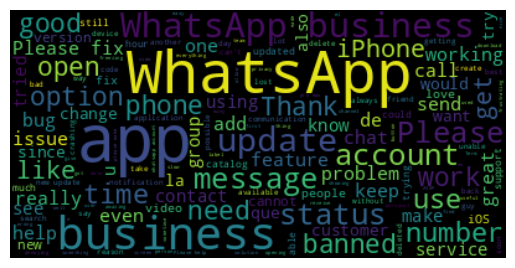

In [6]:
#Creating some wordclouds to see the most frequently used words in the feedback
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Creating stopwords list
stopwords = set(stopwords.words('english'))
stopwords.update(['br','href'])
textt = ' '.join(review for review in data.text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show

In [7]:
#assign reviews with score greater than 3 as positive sentiment
#assign reviews with score lesser than 3 as negative sentiment
#remove score = 3
data = data[data['score'] != 3]
#data.loc[data['sentiment'] > 2, 'score'] = new_val
data['sentiment'] = data['score'].apply(lambda rating : +1 if rating > 3 else -1)

In [8]:
data.head()

,id,date,userName,userUrl,version,score,title,text,url,country,appId,sentiment
0,10990027692,2024-02-28T13:15:16-07:00,a71209417cc69068db96287dcfa258e84a19b36c443521...,c6434d50f03dc3225343d08cb75b120e19dc21937007da...,24.4.78,1,Status sounds,No sound comes from status videos after I upda...,https://itunes.apple.com/au/review?id=13864129...,AU,1386412985,-1
1,10939311897,2024-02-14T14:47:02-07:00,9f7302dde70e971b057aa14cec1d26479a9362da32e9ed...,55105d432b1d6c664523f5de2576a199f8ffa8d8c20e8a...,24.3.76,2,Calls,"Every time I’m on a phone call, it either cut ...",https://itunes.apple.com/au/review?id=13864129...,AU,1386412985,-1
2,10932303253,2024-02-12T15:54:56-07:00,ee939200223a21c2bdea5d17ef0ae2d9a03acfbb914c73...,1c044d9599692ebd0d50f4fb8d886f622ee02c549d76f8...,24.3.76,4,Recommendations,I like being to have a separate account/app fo...,https://itunes.apple.com/au/review?id=13864129...,AU,1386412985,1
3,10859859638,2024-01-24T12:47:22-07:00,10c5a49c9a79ddf4cd973abd6f125b5bf98d9e6cf22fbd...,f713d7f8bf1c1400a223d76013914de72a242f8113163a...,24.1.80,5,Subject: Request for Premium Features in Whats...,"Dear WhatsApp Support Team,\n\nI hope this mes...",https://itunes.apple.com/au/review?id=13864129...,AU,1386412985,1
4,10758670982,2023-12-29T05:13:49-07:00,83481ba5686098a9f7b2b9e374dc5ed7a3627bcd5eb28f...,59528539b374bc7bc8941a2785953ba58da70690e9fdd8...,23.25.86,2,Not satisfied yet,Only seems like someone clicks on your ad when...,https://itunes.apple.com/au/review?id=13864129...,AU,1386412985,-1


In [9]:
#split data into positive and negative sentiment:
positive = data[data['sentiment'] == 1]
negative = data[data['sentiment'] == -1]


In [10]:
positive = positive.dropna()
negative = negative.dropna()

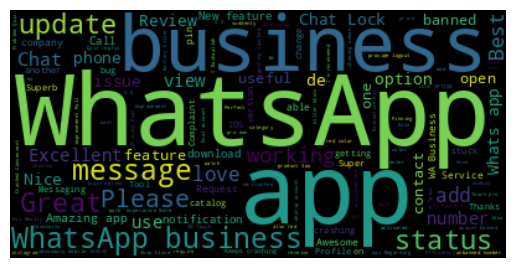

In [11]:
#WordCloud Positive Sentiment
import nltk
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
stopwords.update(['br','stuff', 'href', 'good','Thank', 'like'])

pos = ' '.join(review for review in positive.title)
wordcloud = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

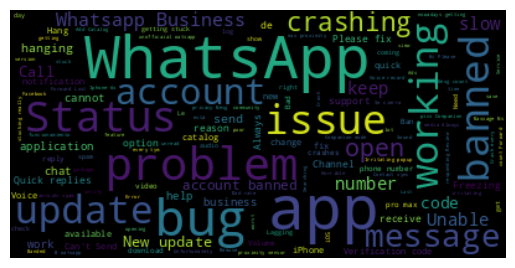

In [12]:
#WordCloud Negative Sentiment
import nltk
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
stopwords.update(['br','stuff', 'href', 'good','Thank', 'like'])

pos = ' '.join(review for review in negative.title)
wordcloud = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
# Distribution of reviews with sentiment across the dataset
data['sentiments'] = data['sentiment'].replace({-1 : 'negative'})
data['sentiments'] = data['sentiment'].replace({1 : 'positive'})

fig = px.histogram(data, x='sentiments')
fig.update_traces(marker_color='indianred', marker_line_color='rgb(8,48,107)',
                 marker_line_width=1.5)
fig.update_layout(title_text='Review Sentiment')
fig.show


<bound method BaseFigure.show of Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'sentiments=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': 'indianred', 'line': {'color': 'rgb(8,48,107)', 'width': 1.5}, 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array([-1, -1, 'positive', ..., 'positive', -1, -1], dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'title': {'text': 'Review Sentiment'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'sentiments'}},
               'yaxis': {'anchor': 'x'

In [14]:
# Building the model
# Step 1: Data Cleaning
def remove_punctuation(text):
    final = ' '.join(u for u in text if u not in('?', '.', ';', ':', '!', "'"))
    return final
data['text'] = data['text'].apply(remove_punctuation)
data = data.dropna(subset=['title'])
data['title'] = data['title'].apply(remove_punctuation)

In [15]:
dataNew = data[['title','sentiment']]
dataNew.head()

,title,sentiment
0,S t a t u s s o u n d s,-1
1,C a l l s,-1
2,R e c o m m e n d a t i o n s,1
3,S u b j e c t R e q u e s t f o r P r e ...,1
4,N o t s a t i s f i e d y e t,-1


In [16]:
# Splitting the data frame into train and test sets
index = data.index
data['random_number'] = np.random.randn(len(index))
train = data[data['random_number'] <= 0.8]
test = data[data['random_number'] > 0.8]

In [17]:
#Count Vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['title'])
test_matrix = vectorizer.transform(test['title'])


In [18]:
#Import Logic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'lbfgs', max_iter=6000)

In [19]:
#split target and independent variables
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [20]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean = False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
#Fitting Model on Data
lr.fit(X_train, y_train)

LogisticRegression(max_iter=6000)

In [22]:
#Make Predictions
predictions = lr.predict(X_test)
print(predictions)

[ 1  1 -1 -1  1 -1  1  1  1  1  1 -1  1 -1  1  1 -1 -1 -1 -1  1  1  1  1
 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1 -1  1  1  1  1  1 -1  1 -1  1  1
  1  1  1  1  1 -1 -1 -1 -1 -1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1
  1  1 -1  1  1 -1 -1  1  1  1  1  1  1 -1  1  1  1 -1  1 -1  1  1  1 -1
 -1  1  1  1  1 -1 -1  1  1  1 -1  1  1  1 -1  1 -1  1 -1  1 -1  1  1 -1
 -1  1  1 -1  1  1  1  1  1 -1 -1 -1  1  1 -1  1  1  1 -1  1  1  1  1 -1
  1  1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1  1 -1 -1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1 -1  1
  1 -1  1 -1  1 -1  1  1  1  1 -1  1 -1 -1 -1 -1  1  1  1 -1  1  1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1]


In [23]:
# Testing the accuracy of the model
from sklearn.metrics import confusion_matrix, classification_report
new = np.asarray(y_test)
confusion_matrix(predictions, y_test)

array([[ 47,  37],
       [ 73, 118]])

In [24]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

          -1       0.39      0.56      0.46        84
           1       0.76      0.62      0.68       191

    accuracy                           0.60       275
   macro avg       0.58      0.59      0.57       275
weighted avg       0.65      0.60      0.61       275

